In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import pandas as pd
from time import sleep
from collections import defaultdict

warnings.filterwarnings(action='ignore')

from tqdm import tqdm
from crawler.utils.daily_reports import DailyReports

%matplotlib inline

In [3]:
elastic_info = {
    'host': 'https://crawler-es.cloud.ncsoft.com:9200', 
    'auth': 'ZWxhc3RpYzpzZWFyY2hUMjAyMA=='
}

reports = DailyReports(**elastic_info, encoded_auth=True)

reports.set_plt_font()

<Figure size 1440x1440 with 0 Axes>

# 인덱스 수량

In [4]:
date_range = '2021-01-01~2021-03-31'
date_range = '2020-09-01~2020-12-31'

neddle = set(['naver', '2020'])

In [5]:
index_size = [x for x in reports.state['size'] if set(x['index'].split('-')).intersection(neddle) == neddle]

In [6]:
df_size = pd.DataFrame(index_size).set_index('index')

df_size['count'] = df_size['count'].astype(float)

reports.custom_display(df_size.describe())

,count
count,9
mean,264275
std,245210
min,24509
25%,100757
50%,138535
75%,342395
max,772002


<AxesSubplot:>

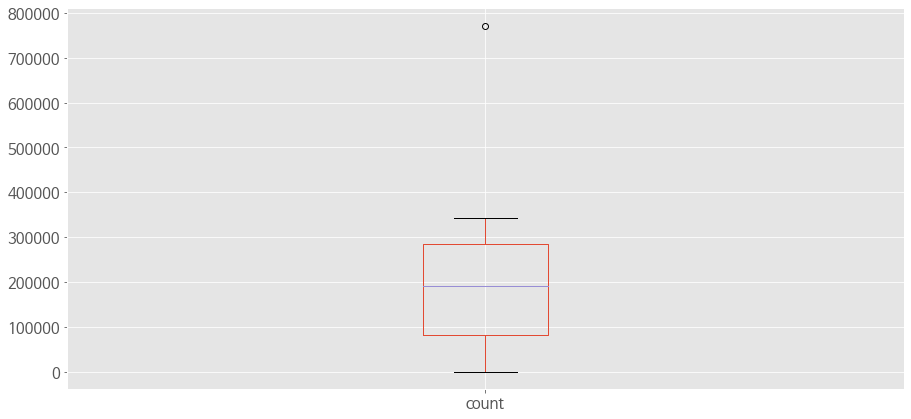

In [7]:
df_size.describe().boxplot(figsize=(15, 7))

In [8]:
reports.custom_display(df_size)

,count
index,
crawler-naver-economy-2020,522892
crawler-naver-international-2020,100757
crawler-naver-it-2020,99612
crawler-naver-living-2020,138535
crawler-naver-opinion-2020,24509
crawler-naver-politics-2020,342395
crawler-naver-society-2020,772002
crawler-naver-sports-2020,265482
crawler-naver-tv-2020,112290


<AxesSubplot:xlabel='index'>

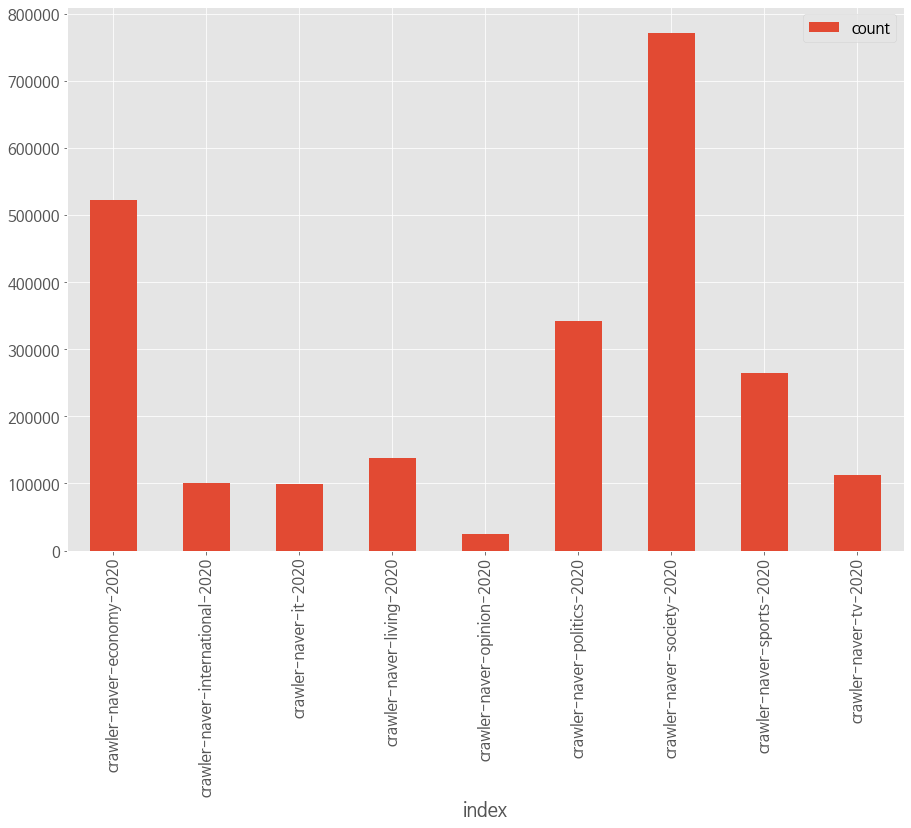

In [9]:
df_size.plot(kind='bar', figsize=(15, 10))

# 날짜별 기사 

In [50]:
index_list = [x for x in reports.state['list'] if set(x.split('-')).intersection(neddle) == neddle]

data = reports.get_index_histogram(index_list=','.join(index_list), date_range=date_range)
    
df_date = pd.DataFrame(data).fillna(0)

In [51]:
reports.custom_display(df_date)

,society,economy,politics,sports,living,tv,international,it,opinion
2020-09-01,5759,5106,3643,0,1384,0,628,1184,117
2020-09-02,6388,5654,3417,0,1875,0,846,1119,272
2020-09-03,7131,5705,2987,0,1975,0,878,1065,264
2020-09-04,4887,4114,2353,0,1303,0,785,824,199
2020-09-05,1180,691,608,0,457,0,420,104,94
2020-09-06,2329,1819,1442,0,607,0,395,389,99
2020-09-07,8413,5121,3041,0,1853,0,727,973,280
2020-09-08,8866,5805,2963,0,1294,0,886,1071,292
2020-09-09,9079,5860,3226,0,1274,0,925,1152,270
2020-09-10,8988,6189,3474,0,1324,0,994,1320,261


In [52]:
reports.custom_display(df_date.describe())

,society,economy,politics,sports,living,tv,international,it,opinion
count,122,122,122,122,122,122,122,122,122
mean,6975,4252,2783,2161,1125,912,819,811,199
std,3013,2223,1359,1544,457,618,275,429,81
min,1180,555,371,0,307,0,312,77,12
25%,3708,1816,1334,590,580,411,510,389,99
50%,8276,5324,3144,2371,1318,1185,903,976,244
75%,9317,5951,3685,3117,1446,1472,984,1143,266
max,11961,7514,5617,6423,1975,1591,2009,1495,296


<AxesSubplot:>

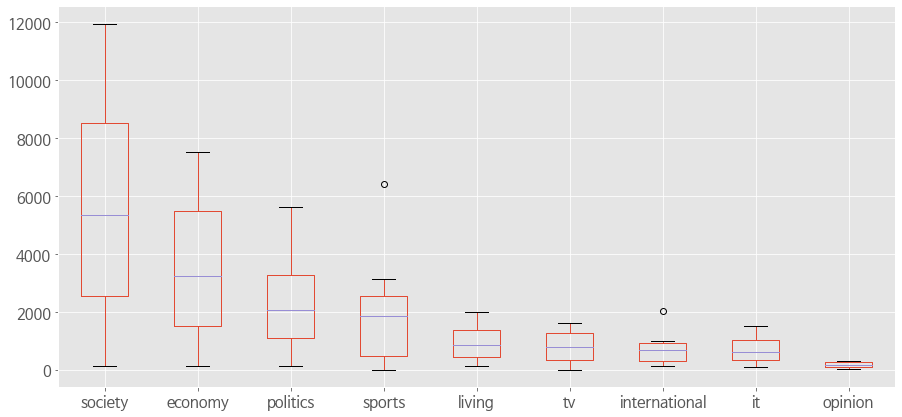

In [53]:
order = df_date.describe().median().sort_values(ascending=False)
df_date.describe()[order.index].boxplot(figsize=(15, 7))

<AxesSubplot:>

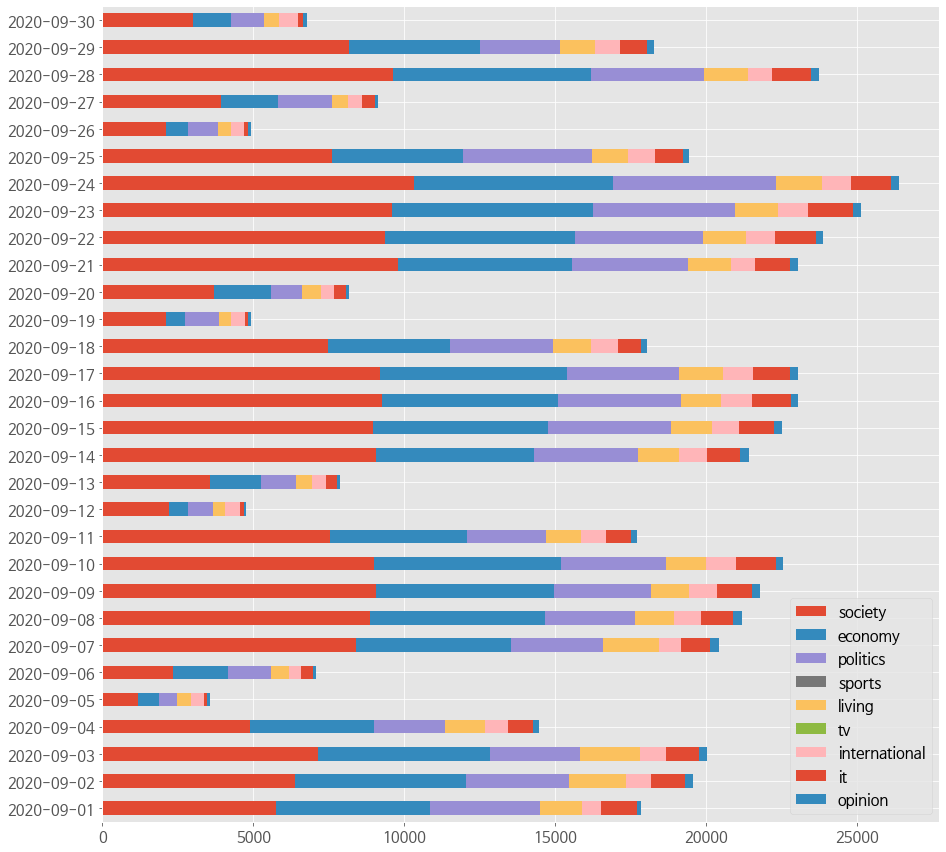

In [62]:
month_st, month_en = 9, 10

mask = (f'2020-{month_st:02}-01' <= df_date.index) & (df_date.index < f'2020-{month_en:02}-01')
display(df_date[ mask ].plot(kind='barh', stacked=True, figsize=(15, 15)))